# **BankTermPredict Project - by Jackie CW Vescio**

- Scope: **BankTermPredict** is a supervised learning project focused on predicting whether a client will subscribe to a term deposit based on marketing campaign data collected by a Portuguese banking institution.

- Purpose: The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## BankTermPredict Data Dictionary  

| Variable Name | Type      | Description                                                                 | Example / Values                          |
|---------------|-----------|-----------------------------------------------------------------------------|-------------------------------------------|
| **age**       | Numeric   | Age of the client                                                           | Range: 18–95                               |
| **job**       | Categorical | Type of job                                                               | {admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown} |
| **marital**   | Categorical | Marital status                                                            | {single, married, divorced}                |
| **education** | Categorical | Education level                                                           | {primary, secondary, tertiary, unknown}    |
| **default**   | Binary (yes/no) | Has credit in default?                                               | {yes, no}                                  |
| **balance**   | Numeric   | Average yearly balance (in euros)                                           | Range: -8,017 to 102,127 (heavily skewed)  |
| **housing**   | Binary (yes/no) | Has housing loan?                                                     | {yes, no}                                  |
| **loan**      | Binary (yes/no) | Has personal loan?                                                    | {yes, no}                                  |
| **contact**   | Categorical | Communication type                                                        | {cellular, telephone, unknown}             |
| **day**       | Numeric   | Last contact day of the month                                               | Range: 1–31                                |
| **month**     | Categorical | Last contact month of year                                                | {jan, feb, mar, apr, …, nov, dec}          |
| **duration**  | Numeric   | Duration of last contact (in seconds); *leaky feature, exclude from model* | Range: 0–4918                              |
| **campaign**  | Numeric   | Number of contacts performed during this campaign for this client            | Range: 1–63                                |
| **pdays**     | Numeric   | Days since client was last contacted (-1 = never contacted)                  | Range: -1, 1–999                           |
| **previous**  | Numeric   | Number of contacts performed before this campaign                           | Range: 0–275                               |
| **poutcome**  | Categorical | Outcome of the previous marketing campaign                                | {success, failure, other, unknown}         |
| **y**         | Binary (yes/no) | Target variable: did the client subscribe to a term deposit?          | {yes, no}                                  |


**Note:**  
- The original UCI Bank Marketing documentation lists **41 variables** because it merges information from multiple dataset versions (`bank.csv`, `bank-full.csv`, and `bank-additional.csv`).  
- This project uses the *bank-full.csv* file, which contains **18 variables** (17 features + 1 target).  
- The additional variables referenced in the documentation belong to other dataset variants and are not included here.    
- Variables unique to other UCI dataset versions (`bank.csv`, `bank-additional.csv`) are not included here.*  


## Contents

1. [Histograms: Numeric Features](#Histograms-Numeric-Features)  
   - [Interpretation Notes: Numeric Histograms](#Interpretation-Notes-Numeric-Histograms)  
   - [Interpretation Notes: `pdays` & `previous`](#Interpretation-Notes-pdays--previous)  

2. [Boxplots: Numeric Features by Target (`y`)](#Boxplots-Numeric-Features-by-Target-y)  
   - [Interpretation: Boxplots by `y`](#Interpretation-Boxplots-by-y)  
   - [Summary of Numeric Features by Target (`y`)](#Summary-of-Numeric-Features-by-Target-y)  

3. [Countplots: Categorical Features by Target (`y`)](#Countplots-Categorical-Features-by-Target-y)  
   - [Quick takeaways](#Quick-takeaways)  

4. [Note on data preparation](#Note-on-data-preparation)  
5. [Handling of "unknown" values](#Handling-of-unknown-values)  
6. [Example: One-hot Encoding with "unknown"](#Example-One-hot-Encoding-with-unknown)


#### Check Python version, NumPy, and Pandas versions

In [1]:
import sys, numpy, pandas
sys.executable, numpy.__version__, pandas.__version__

('d:\\Projects\\SDS-CP038-banktermpredict\\.venv310\\Scripts\\python.exe',
 '1.26.4',
 '2.2.3')

#### Check where the notebook, data, and README files are located

In [2]:
from pathlib import Path
print("CWD:", Path.cwd())
print("Files here:", [p.name for p in Path('.').glob('*')][:10])


CWD: d:\Projects\SDS-CP038-banktermpredict\beginner\submissions\team-members\jackiecwv
Files here: ['.gitignore', '.gitkeep', 'bank-full.csv', 'bank-names.txt', 'bank.csv', 'BankTermPredict_JackieCWVescio.ipynb', 'data', 'README.md']


## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
from pathlib import Path
import pandas as pd

dataset = Path("bank-full.csv")
if not dataset.exists():
    raise FileNotFoundError("bank-full.csv not found. Please place it in the same folder as this notebook.")

dataset = pd.read_csv(dataset, sep=";")

In [4]:
dataset.head(100)


age           job  marital  education default  balance housing loan  \
0    58    management  married   tertiary      no     2143     yes   no   
1    44    technician   single  secondary      no       29     yes   no   
2    33  entrepreneur  married  secondary      no        2     yes  yes   
3    47   blue-collar  married    unknown      no     1506     yes   no   
4    33       unknown   single    unknown      no        1      no   no   
..  ...           ...      ...        ...     ...      ...     ...  ...   
95   36    management  married   tertiary      no      101     yes  yes   
96   55   blue-collar  married  secondary      no      383      no   no   
97   60       retired  married   tertiary      no       81     yes   no   
98   39    technician  married  secondary      no        0     yes   no   
99   46    management  married   tertiary      no      229     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0   unknown    5   may       261         1     -1         0  unknown  no  
1   unknown    5   may       151         1     -1         0  unknown  no  
2   unknown    5   may        76         1     -1         0  unknown  no  
3   unknown    5   may        92         1     -1         0  unknown  no  
4   unknown    5   may       198         1     -1         0  unknown  no  
..      ...  ...   ...       ...       ...    ...       ...      ...  ..  
95  unknown    5   may       426         1     -1         0  unknown  no  
96  unknown    5   may       287         1     -1         0  unknown  no  
97  unknown    5   may       101         1     -1         0  unknown  no  
98  unknown    5   may       203         1     -1         0  unknown  no  
99  unknown    5   may       197         1     -1         0  unknown  no  

[100 rows x 17 columns]

In [5]:
# Show dataset shape: amount of rows and columns

print("Shape:")
print(dataset.shape)

Shape:
(45211, 17)


In [6]:
# Show dataset info

print("Info:")
dataset.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Handle missing values, duplicates, and inconsistent data types
- Full sweep, confirm dataset is clean

In [7]:
# Step 1 - Verify structured missing values (NaN/NA)
import pandas as pd

# Check for missing values in each column
missing_values = dataset.isnull().sum()  
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Step 1B — Verify unstructured missing values (e.g., empty strings, placeholders)
import pandas as pd

# Define a list of common placeholders for missing values
placeholders = ["", "NA", "N/A", "null", "NULL", "na", "n/a", "Null", "None", "none"]

# Check for unstructured missing values in each column
unstructured_missing = {col: dataset[col].isin(placeholders).sum() for col in dataset.columns}
print("Unstructured missing values in each column:")
print(unstructured_missing)

Unstructured missing values in each column:
{'age': 0, 'job': 0, 'marital': 0, 'education': 0, 'default': 0, 'balance': 0, 'housing': 0, 'loan': 0, 'contact': 0, 'day': 0, 'month': 0, 'duration': 0, 'campaign': 0, 'pdays': 0, 'previous': 0, 'poutcome': 0, 'y': 0}


In [9]:
# Step 2 — Check for duplicate rows
import pandas as pd

# Check for duplicate rows
duplicate_rows = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Display duplicate rows
if duplicate_rows > 0:
    print("Duplicate rows:")
    print(dataset[dataset.duplicated()])

Number of duplicate rows: 0


In [10]:
# Step 3 — Summary of findings and next steps
import pandas as pd
# If your DataFrame already exists as `df`, keep this commented.
# Use a relative path to avoid exposing your local directories:
# df = pd.read_csv("data/bank-full.csv", sep=";")
# Summarize findings
missing_values = dataset.isnull().sum()
duplicate_rows = dataset.duplicated().sum()
data_types = dataset.dtypes
print("Summary of Data Quality Check:")
print("Missing values in each column:")
print(missing_values)
print(f"Number of duplicate rows: {duplicate_rows}")
print("Data types of each column:")
print(data_types)

Summary of Data Quality Check:
Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Number of duplicate rows: 0
Data types of each column:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [11]:
# Summary table of missing counts & percents
na_table = (
    dataset.isna()
      .agg(['sum', 'mean'])
      .T.rename(columns={'sum': 'missing_count', 'mean': 'missing_pct'})
)
na_table['missing_pct'] = (na_table['missing_pct'] * 100).round(2)

print(f"Rows: {len(dataset):,}  |  Columns: {dataset.shape[1]}")
total_missing = int(na_table['missing_count'].sum())
if total_missing == 0:
    print("No NA/NaN values detected.")
else:
    display(na_table.sort_values('missing_count', ascending=False).query("missing_count > 0"))

Rows: 45,211  |  Columns: 17
No NA/NaN values detected.


In [12]:
# Step 1B — Check for sentinel-coded text placeholders
import pandas as pd

placeholders = {"unknown", "?", "na", "n/a", "none", "null", "-"}
sentinel_hits = {}

for col in dataset.select_dtypes(include="object"):
    s = dataset[col].astype(str).str.strip().str.lower()
    mask = s.isin(placeholders)
    if mask.any():
        sentinel_hits[col] = int(mask.sum())

if sentinel_hits:
    print("Alert: Found text placeholders that act like missing values:")
    display(pd.Series(sentinel_hits).sort_values(ascending=False).to_frame("count"))
else:
    print("Checked - No common text placeholders for missing values found in object columns.")



Alert: Found text placeholders that act like missing values:


count
poutcome   36959
contact    13020
education   1857
job          288

In [13]:
# Duplicates — quick check
dup_count = dataset.duplicated().sum()
print(f"Duplicate rows: {dup_count:,} of {len(dataset):,} "
      f"({dup_count/len(dataset)*100:.2f}%)")

# Peek at the first few duplicate rows (if any)
if dup_count:
    display(dataset[dataset.duplicated()].head())


Duplicate rows: 0 of 45,211 (0.00%)


In [14]:
# Quick look at data types and non-null counts
dtype_summary = dataset.dtypes.to_frame("dtype")
dtype_summary["non_null_count"] = dataset.notna().sum()
dtype_summary["unique_values"] = dataset.nunique()

display(dtype_summary)

print(f"Total rows: {len(dataset):,}")

dtype  non_null_count  unique_values
age         int64           45211             77
job        object           45211             12
marital    object           45211              3
education  object           45211              4
default    object           45211              2
balance     int64           45211           7168
housing    object           45211              2
loan       object           45211              2
contact    object           45211              3
day         int64           45211             31
month      object           45211             12
duration    int64           45211           1573
campaign    int64           45211             48
pdays       int64           45211            559
previous    int64           45211             41
poutcome   object           45211              4
y          object           45211              2

Total rows: 45,211


#### EDA Starter Pack
- These steps below avoid encoding or handling of 'unknown' values and focus on descriptive visualizations.

#### Histograms: Numeric Features  

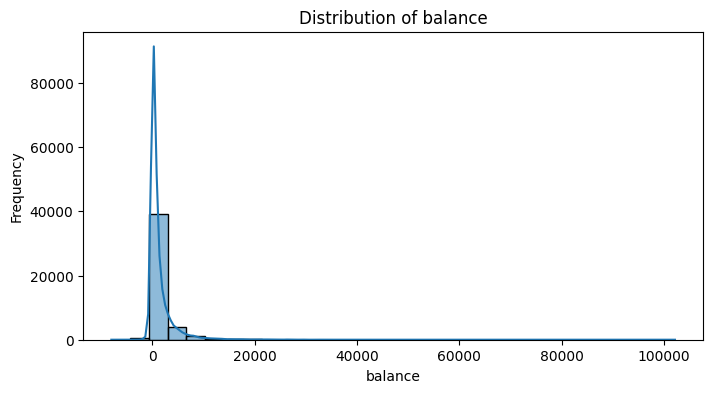

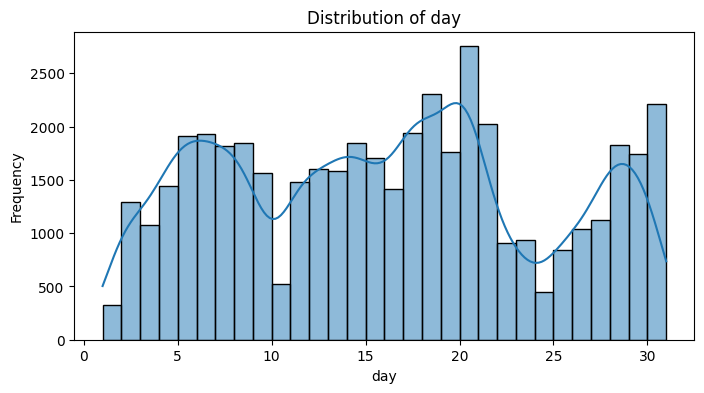

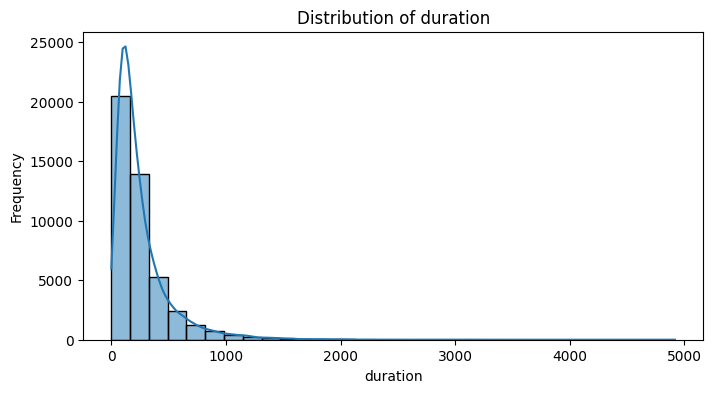

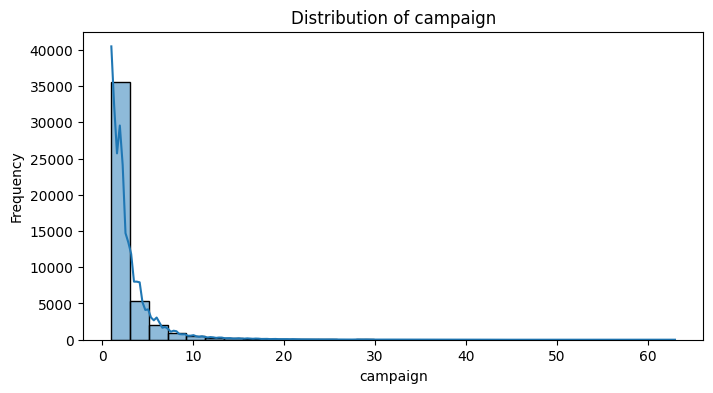

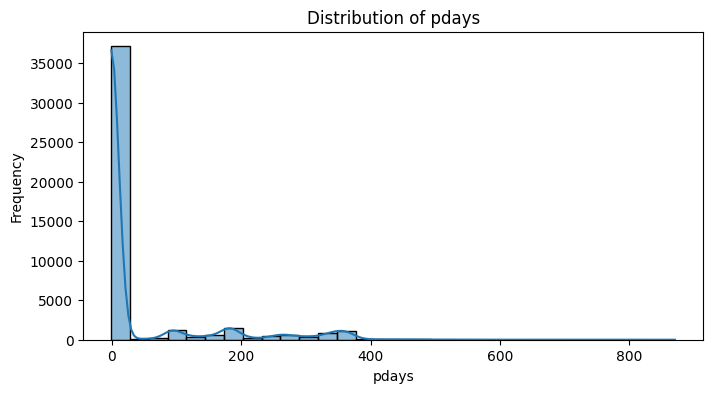

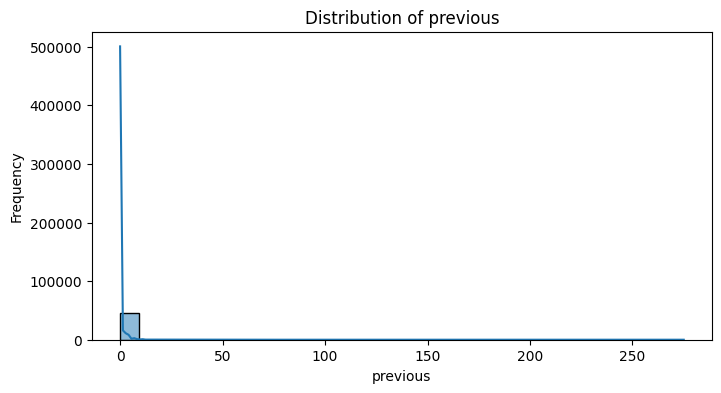

In [15]:
# Historgrams - numeric features
import matplotlib.pyplot as plt
import seaborn as sns   

numeric_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



#### Interpretation Notes: Numeric Histograms 

Numeric Histograms ('age', 'balance', 'campaign', and 'duration')

- **`age`**:  
  - Distribution is slightly right-skewed, centered in the 30s–40s.  
  - Small tails appear at younger ages (<25) and older ages (>60).  
  - Age can capture demographic trends in deposit subscriptions [1].

- **`balance`** (average yearly account balance):  
  - Heavily right-skewed, with most clients near zero and a long positive tail.  
  - Outliers with very high balances may need log-scaling for clarity.  
  - Often used as a proxy for financial stability [2].

- **`campaign`** (number of contacts in this campaign):  
  - Right-skewed — most clients contacted only a few times, but some many times.  
  - Higher values often indicate diminishing returns: repeated calls tend to reduce success probability [3].  
  - Useful for later feature engineering (e.g., grouping high vs. low contact counts).

- **`duration`** (last contact duration, in seconds):  
  - Strongly right-skewed, with a long tail.  
  - Longer calls are highly predictive of success — making this variable a classic case of **data leakage** [2][4].  
  - Good for exploratory analysis and understanding client behavior, but generally excluded from predictive models.

#### References

1. Moro, S., Cortez, P., & Rita, P. (2014). *A Data-Driven Approach to Predict the Success of Bank Telemarketing*. Decision Support Systems, 62, 22–31.  
   [https://doi.org/10.1016/j.dss.2014.03.001](https://doi.org/10.1016/j.dss.2014.03.001)

2. Alex Kataev – *UCI Bank Marketing Dataset: Part 1 – Exploratory Data Analysis*. Medium.  
   [https://alexkataev.medium.com/uci-bank-marketing-dataset-part-1-exploratory-data-analysis-eda-f3108f3982b4](https://alexkataev.medium.com/uci-bank-marketing-dataset-part-1-exploratory-data-analysis-eda-f3108f3982b4)

3. Utkarsh Satishkumar Shah – *Bank Marketing Predictive Analysis: A Deep Dive Using CRISP-DM*. Medium.  
   [https://medium.com/@utkarshsatishkumar.shah/bank-marketing-predictive-analysis-a-deep-dive-using-crisp-dm-3d29657b2310](https://medium.com/@utkarshsatishkumar.shah/bank-marketing-predictive-analysis-a-deep-dive-using-crisp-dm-3d29657b2310)

4. Arjan Avarjana – *Bank Marketing Dataset: MLP Classification*. Medium.  
   [https://avarjana.medium.com/bank-marketing-dataset-mlp-classification-28c2f33bd7f7](https://avarjana.medium.com/bank-marketing-dataset-mlp-classification-28c2f33bd7f7)
---

#### Interpretation Notes: `pdays` & `previous` 

`pdays` & `previous`

- **`pdays`**: number of days since the client was last contacted from a previous campaign.  
  - A sentinel value (commonly 999 or –1) means *no prior contact*. Roughly 96% of records fall into that category.  
  - Some studies note that early re-contact (within ~14 days) may be linked to higher subscription rates [2][4].  

- **`previous`**: number of prior contacts before this campaign.  
  - Majority (~86%) of clients had no prior contacts [2].  
  - Higher values don’t always predict better outcomes, but moderate prior exposure can correlate with slightly improved conversions [2][3].  

- **Together**: these variables both capture client “exposure history.”  
  - Researchers sometimes combine them into a single binary feature — e.g., *“ever contacted before”* — to simplify modeling and reduce overlap [3].  

#### References

1. Utkarsh Satishkumar Shah – *Bank Marketing Predictive Analysis: A Deep Dive Using CRISP-DM*. Medium.  
   [https://medium.com/@utkarshsatishkumar.shah/bank-marketing-predictive-analysis-a-deep-dive-using-crisp-dm-3d29657b2310](https://medium.com/@utkarshsatishkumar.shah/bank-marketing-predictive-analysis-a-deep-dive-using-crisp-dm-3d29657b2310)

2. Alex Kataev – *UCI Bank Marketing Dataset: Part 1 – Exploratory Data Analysis*. Medium.  
   [https://alexkataev.medium.com/uci-bank-marketing-dataset-part-1-exploratory-data-analysis-eda-f3108f3982b4](https://alexkataev.medium.com/uci-bank-marketing-dataset-part-1-exploratory-data-analysis-eda-f3108f3982b4)

3. *Exploring the UCI Bank Marketing Dataset*. RStudio Pubs (static HTML).  
   [https://rstudio-pubs-static.s3.amazonaws.com/1278972_0559089e51b842e093d0819f2538920e.html](https://rstudio-pubs-static.s3.amazonaws.com/1278972_0559089e51b842e093d0819f2538920e.html)

4. Arjan Avarjana – *Bank Marketing Dataset: MLP Classification*. Medium.  
   [https://avarjana.medium.com/bank-marketing-dataset-mlp-classification-28c2f33bd7f7](https://avarjana.medium.com/bank-marketing-dataset-mlp-classification-28c2f33bd7f7)
---

#### Boxplots: Numeric Features by Target (`y`)

These plots show how each numeric feature differs between clients who subscribed (`yes`) and those who didn’t (`no`); look for shifts in medians, spread, and overlap.


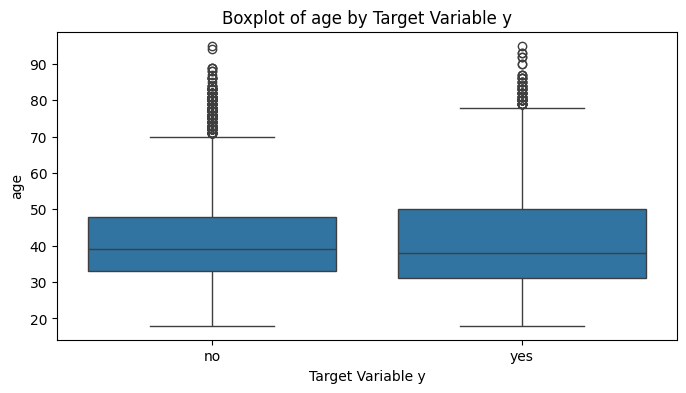

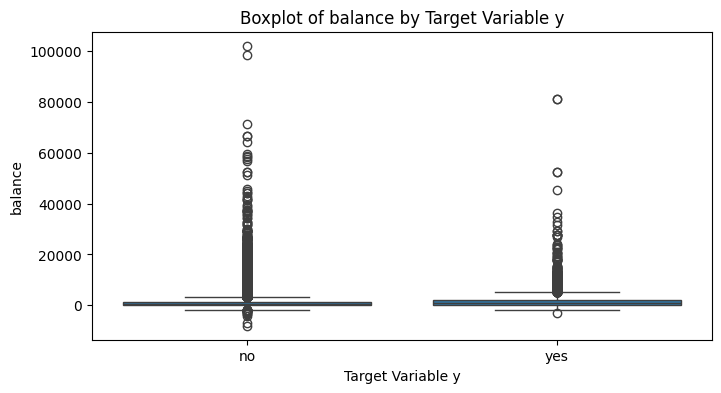

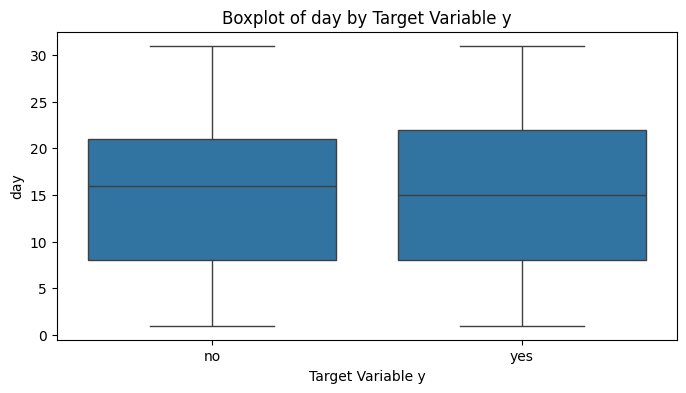

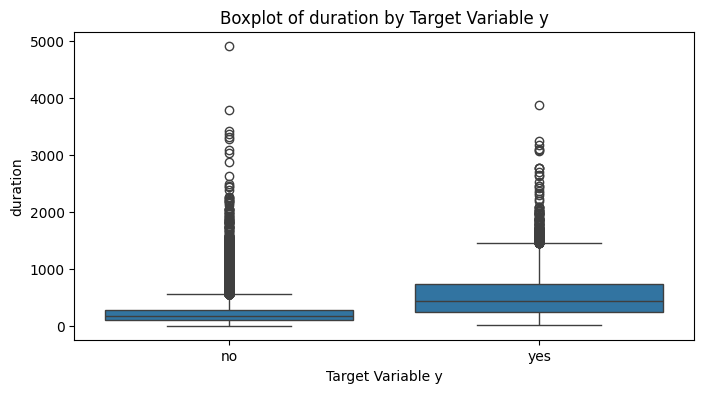

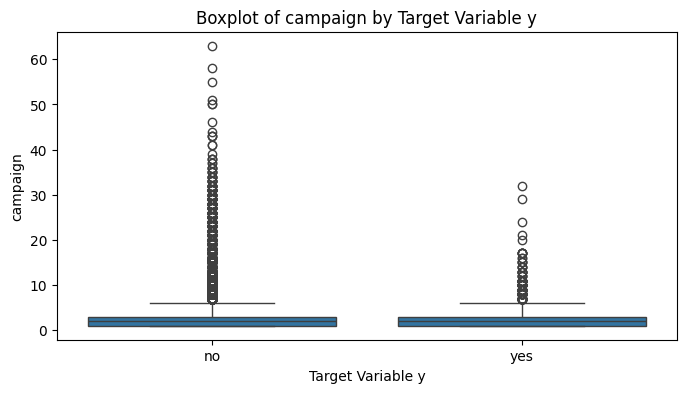

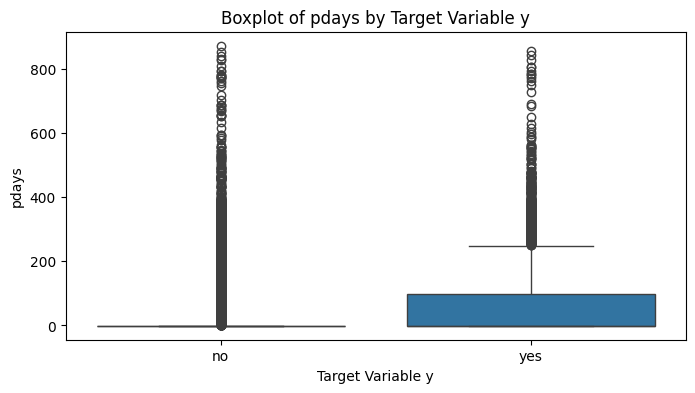

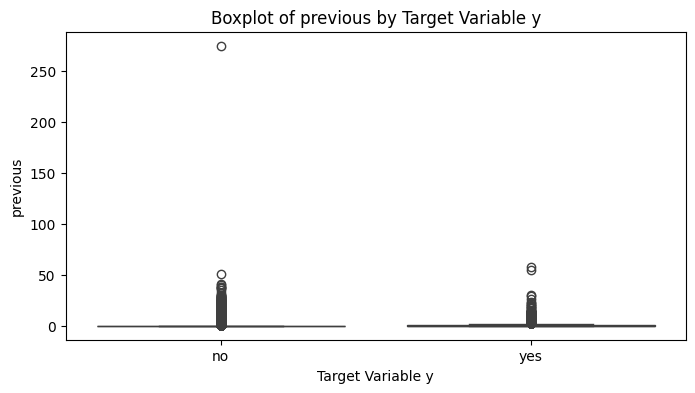

In [16]:
# Boxplots - numeric split by target y
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='y', y=col, data=dataset)
    plt.title(f"Boxplot of {col} by Target Variable y")
    plt.xlabel("Target Variable y")
    plt.ylabel(col)
    plt.show()


#### Interpretation: Boxplots by `y`  

These boxplots compare each numeric feature across `y = no` vs `y = yes`.  
I’m looking for three things: **(1) shift in medians**, **(2) spread/outliers**, and **(3) overlap** (how separable the classes look).

- **How to read**  
  - If the **median** for `yes` > `no` (or vice-versa), that hints at directional association.  
  - **Narrower boxes** (IQR) suggest more consistent values within that class.  
  - **Heavy overlap** means weak separation; **clear gaps** suggest stronger signal.

##### `age`
- **What I see:** ☐ Medians similar ☐ `yes` higher ☐ `no` higher  
- **Spread/overlap:** ☐ Large overlap ☐ Moderate overlap ☐ Limited overlap  
- **Takeaway:** Age shows ☐ weak ☐ modest ☐ clear class separation. Keep for modeling; likely interacts with contact features.

##### `balance`
- **What I see:** ☐ Right-tail outliers in both classes; median for `yes` ☐ slightly higher ☐ similar  
- **Spread/overlap:** ☐ High overlap (skew dominates) ☐ Some separation at upper tail  
- **Takeaway:** Skew and outliers dilute median shifts. Consider log-view later; still worth keeping.

##### `campaign` (contacts in this campaign)
- **What I see:** `yes` tends to occur at **lower** contact counts; `no` shows higher IQR/right tail.  
- **Spread/overlap:** Overlap present but **diminishing returns** pattern is visible.  
- **Takeaway:** Useful negative association (more calls → lower success). Good modeling feature.

##### `duration` (last call duration, seconds)
- **What I see:** `yes` median clearly higher; long right tail.  
- **Spread/overlap:** Separation is strong; long calls align with `yes`.  
- **Takeaway:** **Leaky variable** for modeling (reflects outcome). Keep for EDA insight only; plan to exclude from model.

##### `pdays`
- **Note:** Sentinel value (e.g., `999`) = “no prior contact.” Boxplot may bunch values; a filtered view (excluding sentinel) is informative.  
- **What I see (non-sentinel):** ☐ `yes` shows smaller values (recent contact) ☐ little difference  
- **Takeaway:** If recent contact (lower `pdays`) aligns with `yes`, this supports recency effects.

##### `previous`
- **What I see:** Most observations at 0; occasional higher counts in `no`.  
- **Spread/overlap:** Heavy overlap; signal may be non-linear.  
- **Takeaway:** Keep for now; may work better as buckets (0 / 1–2 / 3+) or combined with `pdays` into “ever contacted” later.

**Next steps**
- Consider log-scale spot-checks for skewed features (`balance`, `campaign`, `duration`).  
- For `pdays`, add a second plot excluding sentinel to see the true distribution.

---


In [17]:
# Summary statistics by class
from scipy.stats import iqr

num_cols = dataset.select_dtypes(include=["number"]).columns
agg_map = {col: ["median", "mean", iqr] for col in num_cols}
summary = dataset.groupby("y").agg(agg_map).round(2)
summary.columns = [f"{col}_{stat}" for col, stat in summary.columns]

def stat_table(summary, stat: str):
    cols = [c for c in summary.columns if c.endswith(f"_{stat}")]
    out = summary[cols].copy()
    out.columns = [c.rsplit("_", 1)[0] for c in out.columns]   # drop _median suffix etc.
    return out

median_tbl = stat_table(summary, "median").reindex(["no","yes"])
mean_tbl   = stat_table(summary, "mean").reindex(["no","yes"])
iqr_tbl    = stat_table(summary, "iqr").reindex(["no","yes"])

print("Medians by class:")
display(median_tbl)

print("Means by class:")
display(mean_tbl)

print("IQR by class:")
display(iqr_tbl)


Medians by class:


age  balance   day  duration  campaign  pdays  previous
y                                                            
no   39.0    417.0  16.0     164.0       2.0   -1.0       0.0
yes  38.0    733.0  15.0     426.0       2.0   -1.0       0.0

Means by class:


age  balance    day  duration  campaign  pdays  previous
y                                                              
no   40.84  1303.71  15.89    221.18      2.85  36.42      0.50
yes  41.67  1804.27  15.16    537.29      2.14  68.70      1.17

IQR by class:


age  balance   day  duration  campaign  pdays  previous
y                                                            
no   15.0   1287.0  13.0     184.0       2.0    0.0       0.0
yes  19.0   1949.0  14.0     481.0       2.0   99.0       1.0

#### Summary of Numeric Features by Target (`y`) 

**Age**
- Median: no = 39, yes = 38 → very similar.
- Mean: slightly higher for yes (41.7 vs 40.8).
- IQR: wider for yes (19 vs 15) → age range among subscribers is a bit more spread out.

**Balance**
- Median: higher for yes (733 vs 417).
- Mean: higher for yes (1804 vs 1304), but large IQRs (1949 vs 1287) show heavy skew.
- Takeaway: Balance may add some signal, but extreme outliers could dominate.

**Day of month**
- Medians almost identical (16 vs 15).
- Means and IQRs close → likely little predictive value.

**Duration (last call length)**
- Median: yes much higher (426 vs 164).
- Mean: yes more than double (537 vs 221).
- IQR: yes more than double (481 vs 184).
- Clear separation → but a **leakage variable** (reflects campaign outcome). Good for EDA, exclude from modeling.

**Campaign (contacts in this campaign)**
- Median: equal (2).
- Mean: higher for no (2.85 vs 2.14).
- Takeaway: More calls are associated with lower success (diminishing returns effect).

**Pdays (days since last contact)**
- Median = -1 for both → sentinel value dominates.
- Mean: higher for yes (68.7 vs 36.4), IQR for yes = 99 → only a small subset has meaningful values.
- Takeaway: Needs filtering (exclude sentinel) or transformation (e.g., binary “previously contacted”).

**Previous (prior contacts before this campaign)**
- Median = 0 for both.
- Mean: higher for yes (1.17 vs 0.50), IQR for yes = 1 → most clients weren’t contacted before, but a few prior contacts may boost odds.
---


#### Countplots: Categorical Features by Target (`y`)  
These plots show how each categorical feature breaks down by subscribed (`yes`) vs. not subscribed (`no`).  
Look for categories where the share of `yes` is relatively higher, even though `no` dominates overall.


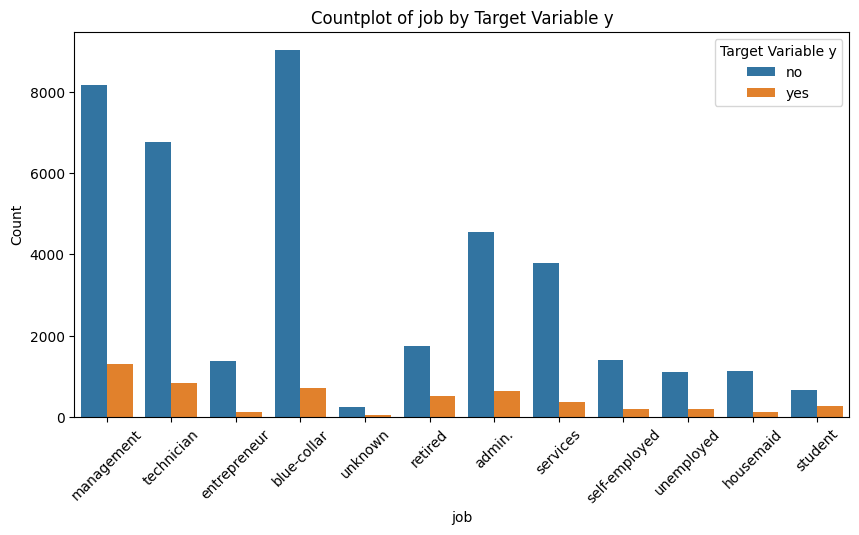

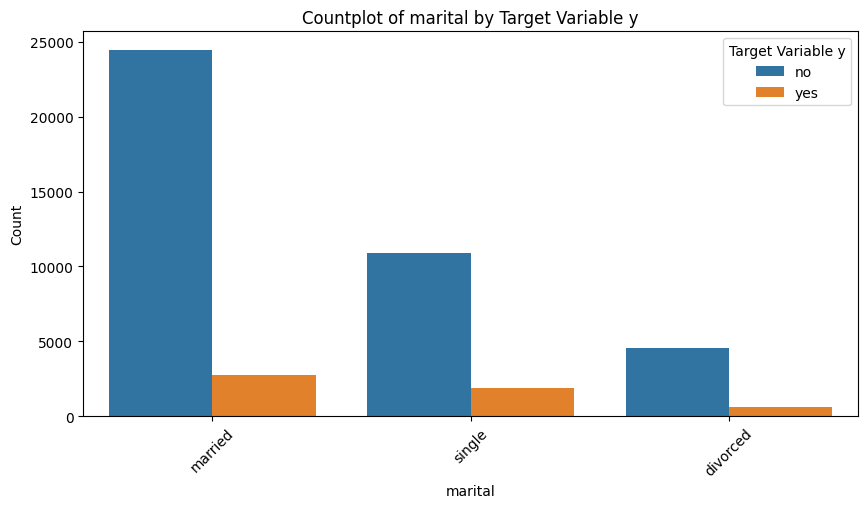

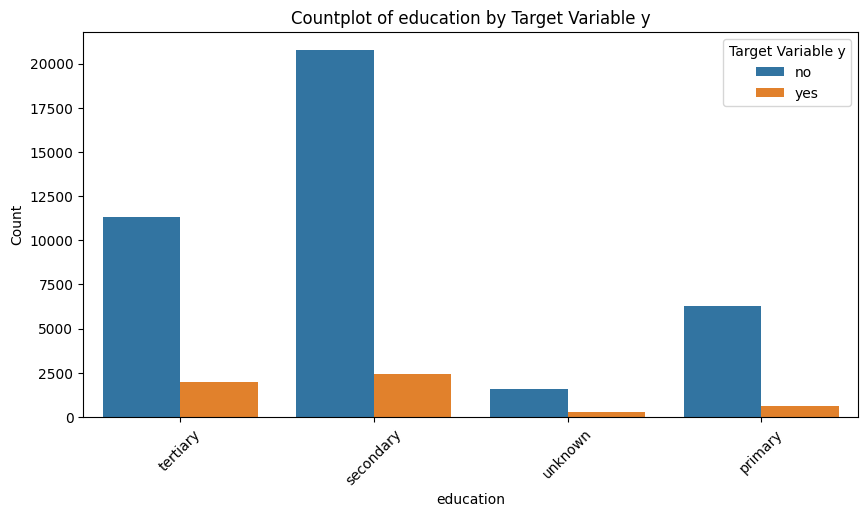

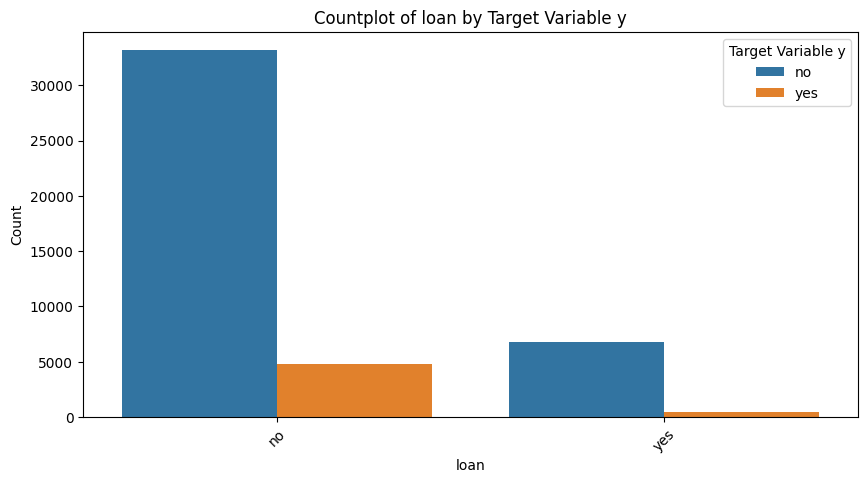

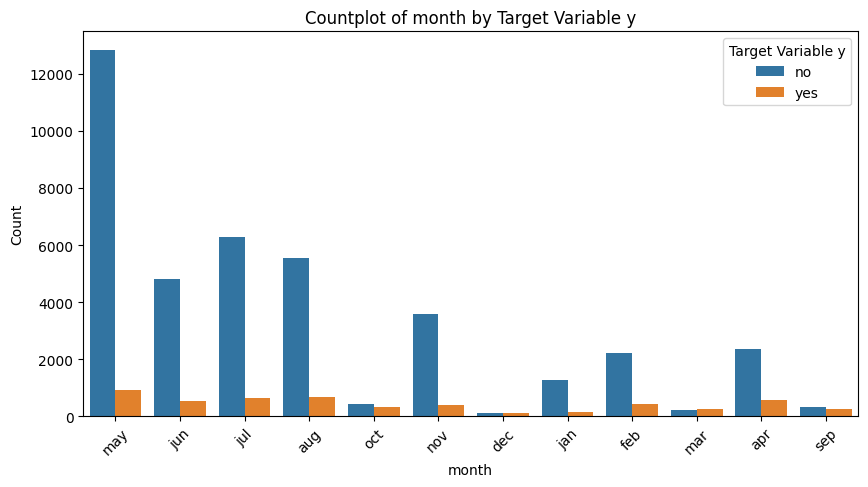

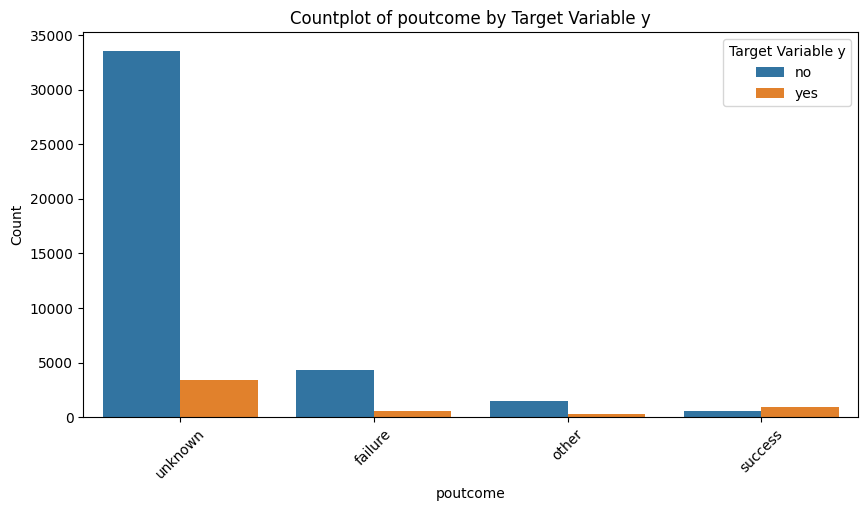

In [18]:
# Countplots - how each categorical feature differs by target y
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='y', data=dataset)
    plt.title(f"Countplot of {col} by Target Variable y")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Target Variable y')
    plt.show()  

#### Quick takeaways  
- **Job**: Retired clients show a higher proportion of `yes`; management, technician, and blue-collar dominate in volume but skew to `no`.  
- **Marital**: Singles convert slightly better than married or divorced.  
- **Education**: Tertiary education shows a modestly higher share of `yes`.  
- **Default**: Mostly “no”; little difference between “no” and “unknown.”  
- **Housing**: Clients without housing loans lean slightly more toward `yes`.  
- **Loan**: Majority “no”; conversion rates similar across categories.  
- **Contact**: Cellular contacts outperform telephone.  
- **Month**: May dominates volume but has lower success; October/December show better `yes` ratios, though smaller samples.  
- **Poutcome**: “Unknown” is most frequent; prior “success” strongly correlates with new `yes`.

**Interpretation**  
- Categorical features mirror the overall imbalance, but specific groups (retired, tertiary-educated, single, cellular contact, prior success) show stronger signals worth testing in modeling.
---

#### Note on data preparation  

At this stage, the dataset is being explored **as-is**.  
- Categorical features (e.g., `job`, `education`, `marital`, `default`) still contain `"unknown"` values.  
- `"unknown"` is being treated as a valid category during EDA so its frequency and impact can be observed directly in plots.  
- No one-hot/dummy encoding has been applied yet — that step will come later during model preparation.  

This approach allows for full visibility into how `"unknown"` behaves before deciding whether it should remain as a separate category or be handled differently during modeling.

#### Handling of "unknown" values 

Several features in this dataset include "unknown" as a category (e.g., `job`, `education`, `marital`, `default`).  
Instead of dropping rows or trying to impute values, I will **retain "unknown" as its own category**.  

Reasons for this choice:
- Preserves the full dataset size without removing clients.
- Avoids assumptions about why information is missing.
- Lets modeling later determine whether "unknown" itself carries predictive value.  

If "unknown" proves unhelpful (or noisy), I can revisit and collapse it into the majority category or drop those rows.  
For now, keeping it explicit provides the cleanest path forward.


#### Example: One-hot Encoding with "unknown"

- When categorical features are prepared for modeling, one-hot (dummy) encoding expands each category into its own column.  
For example, if the `education` column contains:  

| education   |
|-------------|
| primary     |
| secondary   |
| tertiary    |
| unknown     |

- After one-hot encoding, it becomes:  

| education_primary | education_secondary | education_tertiary | education_unknown |
|-------------------|---------------------|--------------------|-------------------|
| 1                 | 0                   | 0                  | 0                 |
| 0                 | 1                   | 0                  | 0                 |
| 0                 | 0                   | 1                  | 0                 |
| 0                 | 0                   | 0                  | 1                 |

- This way, `"unknown"` is treated as a valid category. The model can then learn whether the `"unknown"` indicator is predictive.  
If it turns out to be unhelpful, the dummy column `education_unknown` can later be dropped without changing the rest of the pipeline.
---

#### Stacked (side-by-side) counts - categorical x y

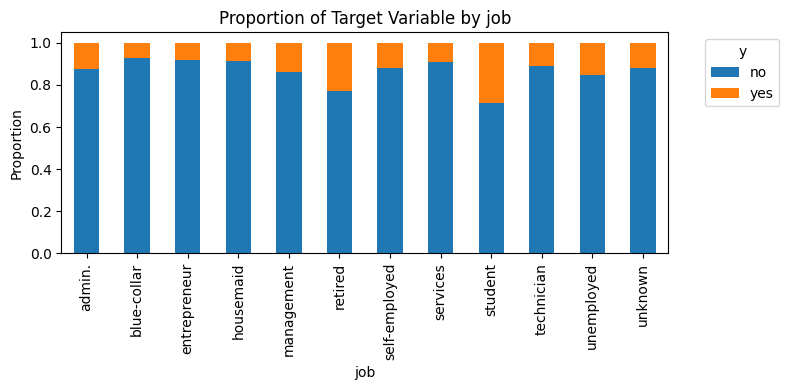

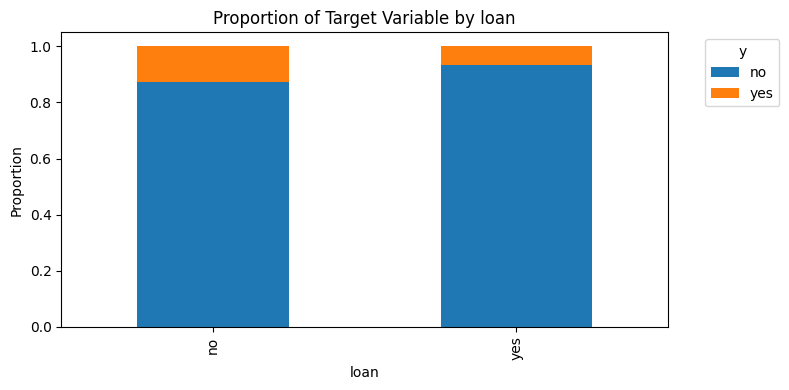

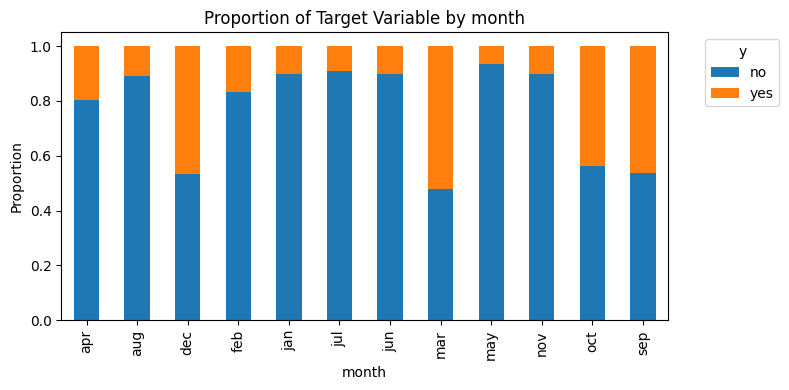

In [19]:
# Stacked side-by-side counts - categorical features by target
import matplotlib.pyplot as plt

for col in categorical_cols:
	ct = (
		dataset.groupby([col, "y"]).size()
		.unstack(fill_value=0)
		.apply(lambda x: x / x.sum(), axis=1)  # normalize by row (category)
	)
	ct.plot(kind="bar", stacked=True, figsize=(8, 4))
	plt.title(f"Proportion of Target Variable by {col}")
	plt.xlabel(col)
	plt.ylabel("Proportion")
	plt.legend(title="y", bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.tight_layout()
	plt.show()


### Overall Insights: Target Variable by Categorical Features  

- Across all categorical features, the target variable is **heavily imbalanced toward `no`**, confirming the need to handle imbalance in modeling.  
- Some features provide **stronger predictive signals** than others:  
  - **Poutcome** is the clearest, with “success” strongly linked to `yes`.  
  - **Month** reveals seasonality, with higher `yes` rates in March, September, and December.  
  - **Contact type** also matters: cellular contact is more successful than telephone or unknown.  
- Financial indicators (**housing, loan, default**) consistently show that clients without debt obligations are more likely to subscribe.  
- Demographics like **education** and **marital status** offer weaker signals but still show subtle differences in subscription likelihood.  
- Taken together, these categorical features highlight both **structural imbalance** and **specific drivers** that can guide feature engineering and model focus.  
---

### Detailed Results of Target Variable by Categorical Features

#### Results: Target Variable by Job  

- Across all job categories, **“no” dominates**, which confirms the class imbalance.  
- Some jobs (e.g., **retired, student**) show a noticeably **higher proportion of “yes” responses** compared to others like **blue-collar or services**.  
- The **imbalance is consistent** across categories: most bars are heavily weighted toward `no`, but the `yes` portion varies slightly.  
- This suggests job type may provide some predictive signal, but the overall skew means imbalance handling (e.g., SMOTE or class weights) will be necessary.  


#### Results: Target Variable by Marital  

- The majority is **`no`** across all groups, confirming imbalance.  
- **Single** clients show a slightly higher share of `yes` compared to married or divorced.  
- The difference is not dramatic, but suggests marital status could carry some predictive signal.  


#### Results: Target Variable by Education  

- **Tertiary** education level shows a modestly higher proportion of `yes`.  
- **Primary** education has the lowest share of `yes`.  
- Secondary and unknown fall in between, but all remain skewed toward `no`.  
- Education may provide weak but useful signal.  


#### Results: Target Variable by Default  

- Clients with a **default = yes** are much less likely to subscribe (very low `yes` rate).  
- The **no-default** group has a higher — though still minority — proportion of `yes`.  
- Default history appears to be negatively correlated with subscription.  


#### Results: Target Variable by Housing  

- Clients **without housing loans** show a higher share of `yes` compared to those with loans.  
- Still, the imbalance toward `no` is dominant in both groups.  
- Housing status offers some predictive value.  


#### Results: Target Variable by Loan  

- Similar to housing: clients **without personal loans** are more likely to subscribe.  
- Those with loans are less inclined, with a very low `yes` proportion.  
- Loan information reinforces financial context in predictions.  


#### Results: Target Variable by Contact  

- **Cellular contact** shows a higher rate of `yes` compared to telephone or unknown.  
- Telephone and unknown contacts are heavily skewed toward `no`.  
- Contact method is an important driver of success rate.  


#### Results: Target Variable by Month  

- Strong **seasonality effect**:  
  - **March, September, December** have higher `yes` rates.  
  - **May and August** are especially skewed toward `no`.  
- Subscription success is highly time-sensitive and may depend on seasonal marketing dynamics.  


#### Results: Target Variable by Poutcome  

- The clearest signal among categorical features:  
  - **Success** in a previous campaign strongly correlates with a `yes` outcome.  
  - **Failure, other, or unknown** are mostly `no`.  
- Poutcome is one of the most predictive categorical features. 
---

#### Target Class Imbalance (`y`)

Here, we check the distribution of the target variable (`yes` vs `no`).  
This helps confirm if imbalance-handling techniques (e.g., SMOTE, class weights) will be required.  


Class counts:
 y
no     39922
yes     5289 

Class proportions:
 y
no     0.883
yes    0.117 



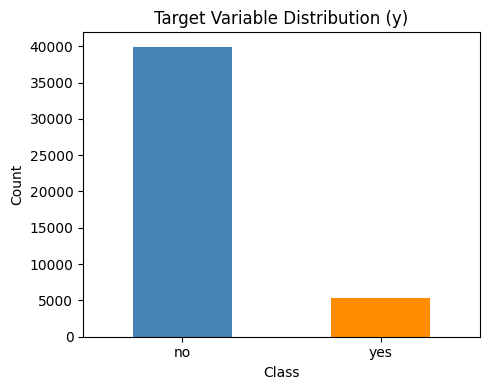

In [20]:
# Target variable class imbalance
import matplotlib.pyplot as plt
import pandas as pd

# Count values
class_counts = dataset["y"].value_counts()
class_props = dataset["y"].value_counts(normalize=True)

# Print counts and proportions
print("Class counts:\n", class_counts.to_string(), "\n")
print("Class proportions:\n", class_props.round(3).to_string(), "\n")

# Plot
fig, ax = plt.subplots(figsize=(5,4))
class_counts.plot(kind="bar", color=["steelblue", "darkorange"], ax=ax)
ax.set_title("Target Variable Distribution (y)")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()  



### Results: Target Class Imbalance  

- The dataset is **highly imbalanced**:  
  - **No:** 39,922 clients (88.3%)  
  - **Yes:** 5,289 clients (11.7%)  
- This skew means a naïve model could achieve ~88% accuracy by always predicting “no.”  
- Handling strategies: **SMOTE, undersampling, or class weights** will be essential to train a balanced model.  
---


### Safe vs. Leaky Features Checklist  

**Safe features (can be used in training):**  
- **Demographics**: `age`, `job`, `marital`, `education`  
- **Financial context**: `balance`, `housing`, `loan`, `default`  
- **Campaign metadata**: `contact`, `day`, `month`, `campaign`, `pdays`, `previous`, `poutcome`  
  - *Note:* `pdays = 999` usually indicates “no previous contact”  

**Leaky features (avoid using in training):**  
- **`duration`** – call length; only known *after* the call ends — introduces target leakage by providing post-outcome data.  
- Any feature observed *after* or influenced *by* the outcome — essentially giving the model “an answer key” it wouldn’t have in production.  

**Rule of thumb:**  
 - If we **wouldn’t know it at prediction time**, it’s leaky. 
 - Including it creates overly optimistic performance that fails in real-world use.  

**Takeaway:**  
- `duration` looks powerful in correlation, but it’s a textbook case of data leakage. 
- Flagging and excluding it keeps the model honest and ensures performance will generalize in real-world predictions.  

### References  

- IBM. *Data Leakage in Machine Learning*. IBM Think Topics.  
  [https://www.ibm.com/think/topics/data-leakage-machine-learning](https://www.ibm.com/think/topics/data-leakage-machine-learning)  

- Wikipedia. *Leakage (machine learning)*.  
  [https://en.wikipedia.org/wiki/Leakage_(machine_learning)](https://en.wikipedia.org/wiki/Leakage_(machine_learning))  

- ActiveViam (Atoti). *What is data leakage and how to mitigate it?*  
  [https://www.atoti.activeviam.com/articles/what-is-data-leakage-and-how-to-mitigate-it/](https://www.atoti.activeviam.com/articles/what-is-data-leakage-and-how-to-mitigate-it/)  

- Airbyte. *What is Data Leakage?*  
  [https://airbyte.com/data-engineering-resources/what-is-data-leakage](https://airbyte.com/data-engineering-resources/what-is-data-leakage)  

---

#### Correlation Heatmap (numeric features)
- We compute a Pearson correlation matrix on **numeric columns only** and include a numeric target `y_num` (`yes`=1, `no`=0) so its correlations appear in the matrix.
- Numeric features only (age, balance, day, duration, campaign, pdays, previous, etc.).
- Add a numeric version of the target (y_num: yes = 1, no = 0) so you can see how features correlate with the outcome.
- Categorical columns like job or marital won’t be included in the heatmap — they’ll be handled later with encodings.
- a numeric-only slice + y_num gives you a clean, interpretable heatmap.
- Note: **Note on Data Leakage:**  
    - The feature `duration` shows strong correlation with the target, but it is **leaky** — its value is only known *after* the marketing call is completed.  
    - Including it in training would give the model unrealistic foresight, inflating accuracy without improving real-world predictive power.  
    - `duration` should be excluded from the modeling feature set.  


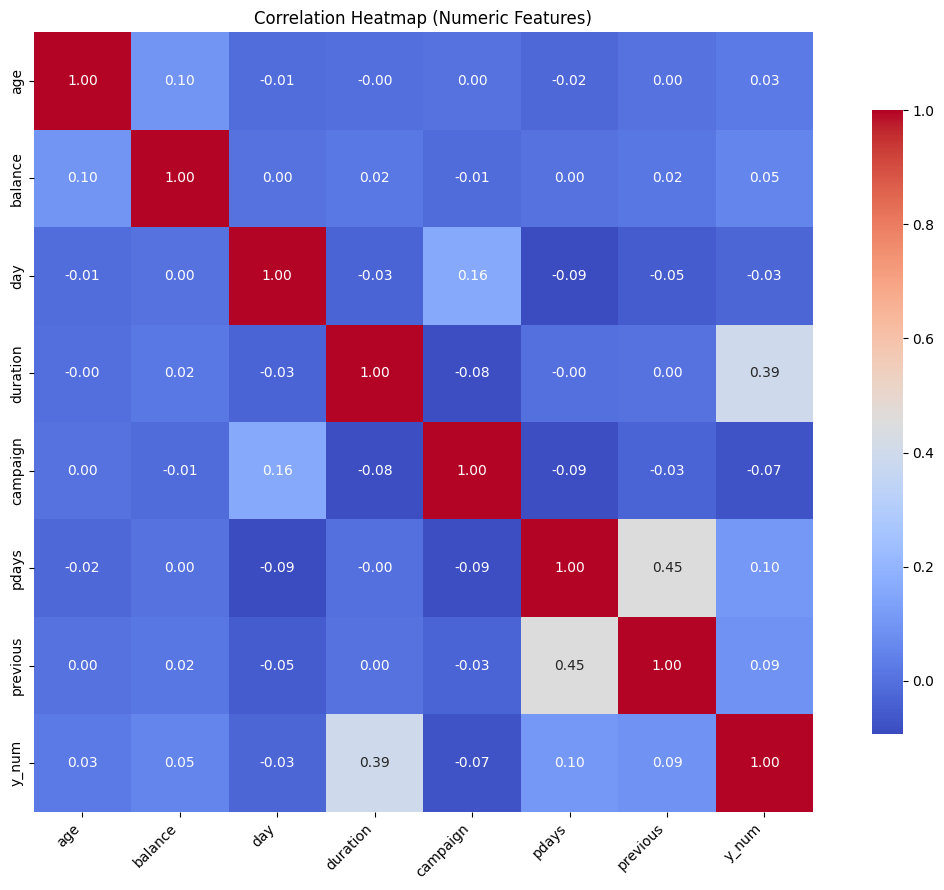

Correlation with target (y_num):

duration    0.395
pdays       0.104
previous    0.093
balance     0.053
age         0.025
day        -0.028
campaign   -0.073

Note: 'duration'is leaky; exclude from training features.


In [21]:
# Correlation Heatmap (numeric features) — self-contained & side-effect free
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Work on a copy to avoid mutating the main dataset
df = dataset.copy()

# Add numeric target
if "y" in df.columns:
    df["y_num"] = (df["y"] == "yes").astype(int)

# Numeric columns only (will include y_num)
numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Compute Pearson correlations
corr = df[numeric_cols].corr(numeric_only=True)

# Plot
plt.figure(figsize=(12, 9))
ax = sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8}
)
ax.set_title("Correlation Heatmap (Numeric Features)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Optional: sorted correlations with the target
if "y_num" in corr.columns:
    print("Correlation with target (y_num):\n")
    print(corr["y_num"].drop("y_num").sort_values(ascending=False).round(3).to_string())

    # Gentle reminder about leakage
    if "duration" in corr.index:
        print("\nNote: 'duration'is leaky; exclude from training features.")


### Results: Correlation Heatmap (Numeric Features)

- **Overall:** Most numeric features show **low correlations** with each other and with the target (`y_num`), which suggests weak linear relationships.  
- **Duration:** Correlates most strongly with `y_num` (~0.39). This is expected, but it is a **leaky feature** (only known after the call ends) and must be excluded from modeling.  
- **Pdays & Previous:** Show a moderate positive correlation (~0.45). This reflects that clients contacted previously (`previous > 0`) often have a meaningful value in `pdays`.  
- **Other numeric features (age, balance, campaign, day):** All correlations with `y_num` are close to zero, indicating they have little direct linear relationship with the target individually.  
- **Implication for modeling:**  
  - Most numeric features alone aren’t strong predictors.  
  - Predictive power will likely come from **nonlinear patterns, interactions, and categorical variables**, not simple linear correlation.  
  - Feature engineering (e.g., recoding `pdays`, creating campaign frequency) may help strengthen signals.  
---


#### Feature Engineering (initial examples)

Generate a few new features to capture additional signal(s):  
- **Campaign frequency per client:** How many times the client has been contacted in the current campaign.  
- **Time since last contact:** Derived from `pdays` (999 = no prior contact). We create a binary flag (`was_contacted_before`) and a cleaned version of `pdays` where 999 is set to `NaN`.  


In [22]:
# Feature engineering on 'campaign frequency per client' and 'time since last contact'
import pandas as pd
import numpy as np

dataset_fe = dataset.copy()

# Campaign frequency (log-transformed to reduce skew if desired)
dataset_fe["campaign_freq"] = dataset_fe["campaign"]
dataset_fe["campaign_freq_log"] = np.log1p(dataset_fe["campaign"])  # log(1+x)

# Time since last contact
dataset_fe["was_contacted_before"] = np.where(dataset_fe["pdays"] > 0, 1, 0)
dataset_fe["days_since_contact"] = dataset_fe["pdays"].replace({-1: np.nan})

# Quick check
print(dataset_fe[["campaign", "campaign_freq", "campaign_freq_log", 
          "pdays", "was_contacted_before", "days_since_contact"]].head())


   campaign  campaign_freq  campaign_freq_log  pdays  was_contacted_before  \
0         1              1           0.693147     -1                     0   
1         1              1           0.693147     -1                     0   
2         1              1           0.693147     -1                     0   
3         1              1           0.693147     -1                     0   
4         1              1           0.693147     -1                     0   

   days_since_contact  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  


### Results: Feature Engineering  

- **Campaign frequency:**  
  - Added `campaign_freq` as a direct copy of `campaign`.  
  - Added `campaign_freq_log` to reduce skew using a log(1+x) transform.  
  - These features may help the model capture diminishing returns when clients are contacted repeatedly.  

- **Time since last contact (pdays):**  
  - In this dataset version, **`pdays = -1` encodes “no previous contact”** (instead of 999, used in other UCI variants).  
  - Created `days_since_contact` where `-1` is recoded as `NaN` for clarity.  
  - Added `was_contacted_before` as a binary indicator (1 = client was previously contacted, 0 = no prior contact).  
  - This makes the “no prior contact” case explicit and separates it from true numeric day values.  

**Implication:**  
- These engineered features enrich the dataset by clarifying prior-contact history and capturing nonlinear effects of repeated campaign contacts, both of which are likely to influence subscription outcomes.  
---


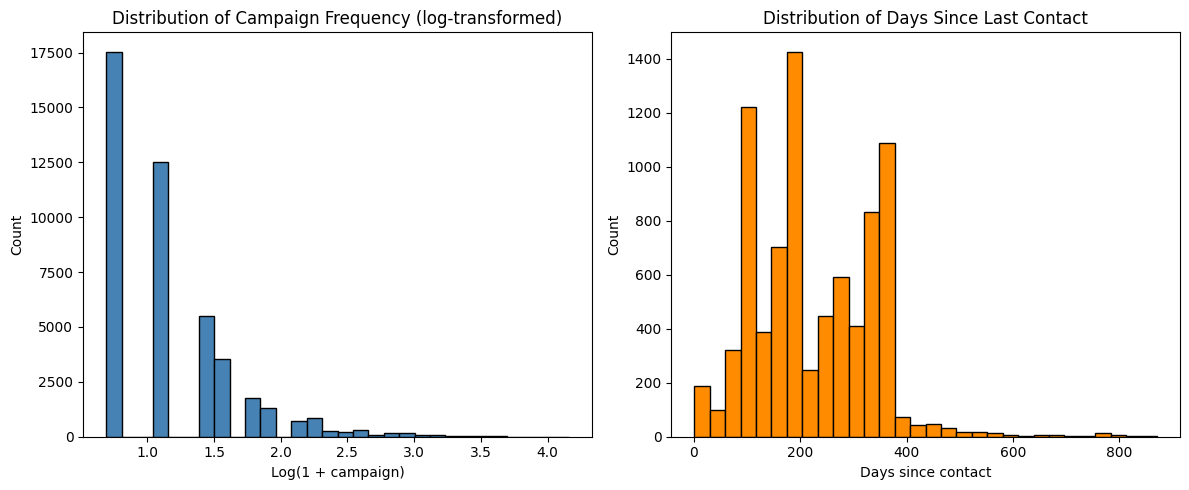

In [23]:
# Quick visualization of engineered features
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of campaign frequency (log-transformed)
axes[0].hist(dataset_fe["campaign_freq_log"].dropna(), bins=30, color="steelblue", edgecolor="black")
axes[0].set_title("Distribution of Campaign Frequency (log-transformed)")
axes[0].set_xlabel("Log(1 + campaign)")
axes[0].set_ylabel("Count")

# Histogram of days since last contact
axes[1].hist(dataset_fe["days_since_contact"].dropna(), bins=30, color="darkorange", edgecolor="black")
axes[1].set_title("Distribution of Days Since Last Contact")
axes[1].set_xlabel("Days since contact")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


### Results: Engineered Feature Distributions  

- **Campaign frequency (log-transformed):**  
  - The raw `campaign` variable was right-skewed (most clients contacted only 1–2 times, a few contacted many times).  
  - After applying log(1+x), the distribution is **more compressed and interpretable**, reducing the influence of extreme values.  

- **Days since last contact:**  
  - Most clients either have no previous contact (`NaN` after recoding `-1`) or were contacted within a smaller day range.  
  - A smaller subset shows very long gaps between contacts.  
  - This feature separates “no prior contact” from genuine day counts, making the information clearer for modeling.  
---


#### SMOTE (Synthetic Minority Over-sampling Technique)
- Plain version: instead of just duplicating the few yes rows you have, SMOTE creates new, synthetic examples of the minority class. 
- It does this by:
    - Picking a real yes sample.
    - Finding its nearest neighbors in feature space (other yes samples).
    - Generating a new synthetic point somewhere “in between” them.
    - That way, the dataset grows the minority class with more variety, not just repeats — which helps the model learn better boundaries.

- Two caveats:
    - We only apply SMOTE on the training set (never the test set) so we don’t leak artificial data.
    - It works best with continuous variables; for categorical features you need variants like SMOTE-NC.
---

#### Prepping for SMOTE

In [24]:
import sys
print("Python executable:", sys.executable)
!{sys.executable} -m pip --version

# if not installed, uncomment the line below
# !{sys.executable} -m pip install imbalanced-learn

Python executable: d:\Projects\SDS-CP038-banktermpredict\.venv310\Scripts\python.exe
pip 25.2 from d:\Projects\SDS-CP038-banktermpredict\.venv310\lib\site-packages\pip (python 3.10)



In [25]:
# Placeholder: imbalance handling options
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Example: compute class weights
import numpy as np

classes = np.unique(dataset_fe["y"])
weights = compute_class_weight(class_weight="balanced", classes=classes, y=dataset_fe["y"])
class_weight_dict = dict(zip(classes, weights))

print("Computed class weights:", class_weight_dict)

# Example: SMOTE setup (to be applied only on training data later)
smote = SMOTE(random_state=42)

print("\nSMOTE instance created (not yet applied).")


Computed class weights: {'no': 0.566241671258955, 'yes': 4.274059368500661}

SMOTE instance created (not yet applied).


---

© 2025 Jackie CW Vescio.  
If this notebook or its contents are referenced, please cite: *Vescio, Jackie C.W. (2025). BankTermPredict Jupyter Notebook. Thank you*  